# Project 1 -- Louis Gonzalez

No Collaboration or help from a TA.

Various websites were used for debugging and links are commented in the codes below

## Question 1

For this course, projects will be solved using the Anvil computing cluster.

Each cluster is a collection of nodes. Each node is an individual machine, with a processor and memory (RAM). Use the information on the provided webpages to calculate how many cores and how much memory is available in total for the Anvil "sub-clusters".

Take a minute and figure out how many cores and how much memory is available on your own computer. If you do not have a computer of your own, work with a friend to see how many cores there are, and how much memory is available, on their computer.

# Answer
The total amount of cores in the anvil sub-clusters is 134,144 cores and the total amount of memory in the anvil sub-clusters is 296,192 GB of memory.

In my own computer, there is in total 16 GB of memory and two processing cores ( i7-7500U CPU @ 2.70GHz   2.90 GHz)

## Question 2

In [ ]:
import socket
print(socket.gethostname())


# Output
The name of the node being run on Anvil is:
a242.anvil.rcac.purdue.edu

## Question 3


In the upper right-hand corner of your notebook, you will see the current kernel for the notebook, f2022-s2023. If you click on this name you will have the option to swap kernels out — no need to do this yet, but it is good to know!

Practice running the following examples.


# Python

In [ ]:
my_list = [1, 2, 3]
print(f'My list is: {my_list}')

Output : My list is: [1, 2, 3]

## SQL

In [ ]:
%sql sqlite:////anvil/projects/tdm/data/movies_and_tv/imdb.db

In [ ]:
%%sql

SELECT * FROM titles LIMIT 5;

Output:  

title_id 	type 	primary_title 	original_title 	is_adult 	premiered 	ended 	runtime_minutes 	genres
tt0000001 	short 	Carmencita 	Carmencita 	0 	1894 	None 	1 	Documentary,Short
tt0000002 	short 	Le clown et ses chiens 	Le clown et ses chiens 	0 	1892 	None 	5 	Animation,Short
tt0000003 	short 	Pauvre Pierrot 	Pauvre Pierrot 	0 	1892 	None 	4 	Animation,Comedy,Romance
tt0000004 	short 	Un bon bock 	Un bon bock 	0 	1892 	None 	12 	Animation,Short
tt0000005 	short 	Blacksmith Scene 	Blacksmith Scene 	0 	1893 	None 	1 	Comedy,Sho

## Bash

In [ ]:
%%bash

awk -F, '{miles=miles+$19}END{print "Miles: " miles, "\nKilometers:" miles*1.609344}' /anvil/projects/tdm/data/flights/subset/1991.csv

Output:
Miles: 3263678656 
Kilometers:5.25238e+09

## Question 4

# Answer
There are 13 markdown cells and 4 code cells

## Question 5

# A list of items I wish were taught in the datamine from most interested (Top) to least (Bottom) interested:

- Julia programming language
- Feature Engineering
- ML Modeling
- Dynamic Scripting
- Object Oriented programming
- Interviewing
- Coding Interviews
- Building Data Science resumes


## Question 6

# Python function and script

In [ ]:
"""
Source for matplotlib plotting: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
Source for matplotlib arguments: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim
Source for pandas data handling: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
Source for python counter: https://realpython.com/python-counter/
"""


#####Importing libraries####
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn as sk
import numpy as np
import csv
############################

#####Defining method for reading and cleaning dataframes with pandas#####
def clean_df(file, thresh, samps): #thresh refers to theshold of dataframe length, file is either the file path or name of csv file, samps is the amount of samples to sample if DF length is > thresh
    df = pd.read_csv(file)
    df = df.dropna(axis = 1) #drops columns with nan values
    if len(df) > thresh:
        df = df.sample(n = samps, replace = False, random_state = 99) #if the length of DF is > thresh, the DF is samples without replacement for a smaller dataset to prevent system fault
    return df
#########################################################################
file = "/anvil/projects/tdm/data/flights/subset/1991.csv"
thresh = 5000
samples = 20000

Flight_data = clean_df(file, thresh, samples) #return clean data set


#####For a given month (integer) this function will take a list of months and CRSElapsed times, and find elapsed times >= time threshold (ELT) for given month#####
def month_arrivals(Months, CRSelts, Month_number, ELT): # months = list of months (integers), list of CRSelapsedTimes, Month_number = month as integer, ELT = threshold elapsed time
    month = 0
    ranges = list(range(len(CRSelts)))
    for i in ranges:
        if Months[i] == Month_number and CRSelts[i] >= ELT:
            month += 1
    return month
###################################################################################################################################################################
time_thresh = 200
elapsed_times = list(Flight_data["CRSElapsedTime"])
month_list = list(Flight_data["Month"])

counts = [] #empty list for adding times > time_thresh
month = list(range(1,13)) #list of months from 1-12

#####For loop to quick iterate through months 1-12 (Jan-Dec) without the need for making separate variables
for i in month:
    counts.append(month_arrivals(month_list, elapsed_times, i, time_thresh))

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #list of month names to be used for the x-axis of a bar graph

###Visualizing data
plt.bar(month_names, counts, align = 'center')
plt.ylim(150, 200)
plt.title('Counts of CRSElapsedTimes > 200')
plt.ylabel('Counts')
plt.xlabel('Month')



In [ ]:
# Analysis of Python Script

Python is an easy language to learn for general purposes. One issue is the extensive coding needed to do a simple analysis such as counting the amount of times a flight CRSElapsed time was greater than a defined threshold. 

##R Function and Script

In [ ]:
%%R

#Determine reading csv files in R: https://swcarpentry.github.io/r-novice-inflammation/11-supp-read-write-csv/
#Removing nan containing columns: https://www.statology.org/remove-columns-with-na-in-r/
#Creating a function in R: https://swcarpentry.github.io/r-novice-inflammation/02-func-R/
#Building box plots: https://www.statmethods.net/graphs/boxplot.html
#set seed: https://r-coder.com/set-seed-r/'
#if statements : https://bookdown.org/ndphillips/YaRrr/using-if-then-statements-in-functions.html

####Fuction that reads csv files and removes columns where all values are NAN####
read_clean <- function(filename, thresh, samplesize) { #file name = name of csv file or directory of csv file, thresh = threshold of number of rows in data fram, samplesize = size of desired sample to pull from dataframe
    file_data <- read.csv(filename) #read csv file
    df <- data.frame(file_data) #convert read data into data frame
    new_df <- df[ , colSums(is.na(df))==0] #remove columns where all values are nan
    if (nrow(df) > thresh) { #if statement that samples the index of desired number of rows from data frame and forms a new sampled data frame with the sampled indices
        sampled_rows <- sample(1:nrow(new_df), samplesize)
        sampled_df <- new_df[sampled_rows, ]
    }
}
#################################################################################

file <- '/anvil/projects/tdm/data/flights/subset/1991.csv'
threshold <- 1000
samples <- 200
set.seed(10)
flights <- read_clean(file, threshold, samples)
#sampled_flight_rows <- sample(1:nrow(flights), samples)
#sampled_flights <- flights[sampled_flight_rows, ]

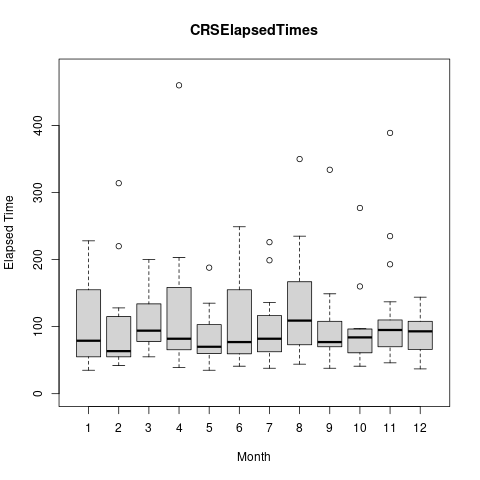

In [15]:
%%R
head(flights) #checks on dataframe to make sure the proper columns are dropped

#box plot for visualizing distribution and outliers of CRS elasped times for each month
boxplot(CRSElapsedTime~Month, data = flights, main = "CRSElapsedTimes", xlab = "Month", ylab = "Elapsed Time", ylim = c(0 , 480)) 


# Analysis of R

R has a slightly steeper learning curve than Python, however the language is specialized for datascience and statistical analysis of big data. With a fraction of lines compared to python, I was able to do the same but go even further and obtain a statistical plot of the same data interrogated in python. In this case, I did not have to load any libraries to build my functions or do any statistical analysis. R is also much faster at processing very large datasets compared to python.

## Bash Function

In [20]:
%%bash
#conversion factor for feet was googled and is 5280 feet per mile
awk -F, '{miles=miles+$19}END{print "Miles: " miles, "\nFeet:" miles*5280}' /anvil/projects/tdm/data/flights/subset/1991.csv

Miles: 3263678656 
Yards:17232223303680


# Analysis of Bash Scripting

This one was definitely more difficult to work with. I changed the conversion from mile to kilometers to miles to yards

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.